In [2]:
import numpy as np
import pandas as pd
import re #regEx
import string


In [3]:
data_true = pd.read_csv(r'../data/True.csv')
data_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
data_false = pd.read_csv(r'../data/Fake.csv')
data_false.head(5)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
data_true.shape

(21417, 4)

In [5]:
#lets give class for both data before concatting

data_false['class']= 0
data_true['class'] = 1 

In [6]:
data = pd.concat([data_false,data_true])

In [7]:
data.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [8]:
data[data['class'] == 1]

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [9]:
#check outliers

data.isna().any()

title      False
text       False
subject    False
date       False
class      False
dtype: bool

In [7]:
#remove title no use
data= data.drop(['title','subject','date'],axis='columns')

In [8]:
data.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [12]:
data.columns

Index(['text', 'class'], dtype='object')

In [10]:
def wordconvertor(text):
    # text to lowercase
    text = text.lower()
    # remove text within []
    text = re.sub(r'\[.*?\]', '', text)
    # no urls
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    #ho html tages
    text = re.sub(r'<.*?>', '', text)
    # remove prunctuations
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)
    # line breaker removal
    text = re.sub(r'\n', '', text)
    # remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)
    return text


#text = "Hello! Check out this [amazing] site: https://example.com. It's great!"
#output: hello check out this site its great


In [11]:
data['text']= data['text'].apply(wordconvertor)

In [12]:
#lets decalare the dataset

x=data['text']
y=data['class']

In [13]:
#lets split the data set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [17]:
X_train.shape

(31428,)

In [18]:
y_test.shape

(13470,)

Applying NLP Techniques

In [14]:

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer #also known as bag of words
from sklearn.feature_extraction.text import TfidfVectorizer


CountVectorizer comes with limitation

Lets check the differences


In [20]:
corpus = [
    "helo how are you doing",
    "hi i am doing fine"
]
vectorizer = CountVectorizer()
X= vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())

['am' 'are' 'doing' 'fine' 'helo' 'hi' 'how' 'you']


In [21]:
X.toarray()

array([[0, 1, 1, 0, 1, 0, 1, 1],
       [1, 0, 1, 1, 0, 1, 0, 0]])

TF-iDF VEctorizer

In [22]:

#max features: only going totakes that words that holds the top 30000 
def vectorize_text (features,max_features):
    vectorizer = TfidfVectorizer(stop_words = 'english', #remove stop words like hi , how, you etc
                                 decode_error='strict',
                                 analyzer = 'word',
                                 ngram_range=(1,2),#range 
                                 max_features = max_features)
    feature_vec = vectorizer.fit_transform(features)
    return feature_vec.toarray()

In [23]:
tfd_test = vectorize_text(['helo how are you doing','hi i am doing fine'],30)
tfd_test

array([[0.44943642, 0.        , 0.        , 0.6316672 , 0.6316672 ,
        0.        , 0.        ],
       [0.33517574, 0.47107781, 0.47107781, 0.        , 0.        ,
        0.47107781, 0.47107781]])

In [24]:
#helo how are you doing','hi i am doing fine'

#output: hello how doing,' hi doing fine'

LEts apply TFiDF on top of count vector for better result

In [15]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm ='l2')
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [16]:
tf_idf_matrix

<31428x167134 sparse matrix of type '<class 'numpy.float64'>'
	with 6409087 stored elements in Compressed Sparse Row format>

In [17]:
# tf_idf_matrix.toarray().shape

MOdeling


In [28]:
data

,text,class
0,donald trump just couldn t wish all americans ...,0
1,house intelligence committee chairman devin nu...,0
2,on friday it was revealed that former milwauke...,0
3,on christmas day donald trump announced that h...,0
4,pope francis used his annual christmas day mes...,0
...,...,...
21412,brussels reuters nato allies on tuesday welco...,1
21413,london reuters lexisnexis a provider of legal...,1
21414,minsk reuters in the shadow of disused soviet...,1
21415,moscow reuters vatican secretary of state car...,1


In [18]:
#split again
X_train,X_test,y_train,y_test =train_test_split(tf_idf_matrix,y_train,test_size=0.2,random_state=42) 

In [19]:
X_train.shape

(25142, 167134)

In [31]:
y_test.shape

(6286,)

Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [21]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print('Accuracy of Lasso classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Lasso classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
from sklearn.naive_bayes import MultinomialNB
cm = confusion_matrix(y_test, pred)
cm

Accuracy of Lasso classifier on training set: 1.00
Accuracy of Lasso classifier on test set: 0.99


c:\Users\ghoas\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[3217,   17],
       [  21, 3031]], dtype=int64)

In [22]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
model=LR.fit(X_train,y_train)

In [23]:

LR.score(X_test,y_test)

0.9847279669105949

In [24]:
#lets check with more model using svc
# lets check with grid search cv


from sklearn.svm  import SVC



from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from  sklearn.linear_model import Lasso
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

model_params = {

    'lasso':{
        'model':Lasso(),
        'params':{
            'alpha':[1,2],
            'selection':['random','cyclic']
        }
    },

    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [1, 5, 10]
        }
    }
 
}


Text(70.72222222222221, 0.5, 'Truth')

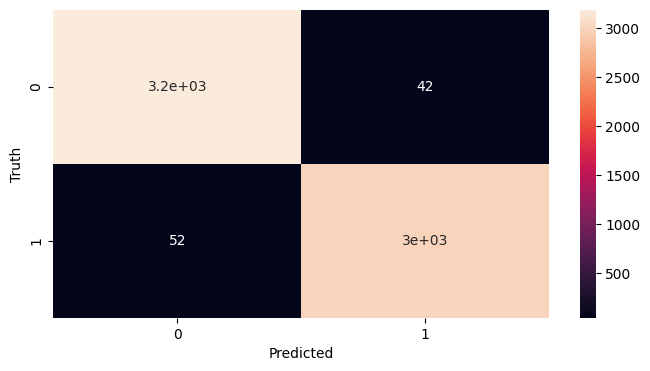

In [128]:
from sklearn.metrics import confusion_matrix
import  seaborn as sn
import matplotlib.pyplot as plt 

y_pred = model.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 4))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [129]:
# model.predict([["Five of the nearly dozen people reported to have died in the fires raging around Los Angeles lived within blocks of each other, in a close-knit Altadena neighborhood near the eastern portion of the city.The area abutted Angeles National Forest, and residents said many people had lived there for generations, handing down homes they bought decades ago and that they had meticulously kept up.Two of the dead, a father and his son, who had cerebral palsy, had called for help evacuating, but none came. One of the victims was found near a garden hose he had been using to spray his house as the fire bore down.At least 11 people total have been reported dead across Los Angeles County, according to the Los Angeles County Medical Examiner’s office. Among them, six people died in the Eaton fire in the east, and five in the Palisades fire near the coast."]])

In [135]:
from sklearn.model_selection import ShuffleSplit


scores = [] 
cv=ShuffleSplit(n_splits= 5, test_size = 0.2, random_state = 0 )
for model_name,md in model_params.items():
    gs=GridSearchCV(md['model'],md['params'],cv=cv, return_train_score= False)
    gs.fit(X_train,y_train)
    scores.append({
        'model':model_name,
        'best_score':gs.best_score_,
        'best_params':gs.best_params_
    })

data_score = pd.DataFrame(scores)

c:\Users\ghoas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ghoas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ghoas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ghoas\AppData\Local\Programs\Python\P

In [136]:
data_score

,model,best_score,best_params
0,lasso,-0.000109,"{'alpha': 1, 'selection': 'random'}"
1,random_forest,0.911473,{'n_estimators': 5}
2,logistic_regression,0.989501,{'C': 10}


In [25]:
#Assiging the variables again as once transformed vectors can't be transformed again using pipeline.
X_train = data['text']
Y_train = data['class']

In [26]:
from sklearn.pipeline import Pipeline


In [27]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('clf', LogisticRegression(C=1e5)),
])

In [28]:
pipeline.fit(X_train, Y_train)

c:\Users\ghoas\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0))])

In [29]:
pipeline.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])

array([0], dtype=int64)

In [30]:
pipeline.predict(["Five of the nearly dozen people reported to have died in the fires raging around Los Angeles lived within blocks of each other, in a close-knit Altadena neighborhood near the eastern portion of the city.The area abutted Angeles National Forest, and residents said many people had lived there for generations, handing down homes they bought decades ago and that they had meticulously kept up.Two of the dead, a father and his son, who had cerebral palsy, had called for help evacuating, but none came. One of the victims was found near a garden hose he had been using to spray his house as the fire bore down.At least 11 people total have been reported dead across Los Angeles County, according to the Los Angeles County Medical Examiner’s office. Among them, six people died in the Eaton fire in the east, and five in the Palisades fire near the coast."])

array([1], dtype=int64)

In [31]:
pipeline.predict(["A groundbreaking study published by the Global Nutrition and Wellness Journal has revealed that eating chocolate daily can lead to weight loss more effectively than traditional exercise. The study, conducted over six months with 5,000 participants, showed that individuals who consumed a bar of dark chocolate every morning lost an average of 10 pounds without any additional physical activity.Dr. Emily Harrington, the lead researcher, stated, The antioxidants in chocolate, combined with its natural compounds, help boost metabolism and reduce fat absorption.The team plans to expand the study to include milk chocolate and white chocolate in the future.The findings have sparked debates across the scientific community, with some experts calling it a game-changer while others are skeptical. Meanwhile, chocolate companies have seen a surge in sales since the study was published."])

array([0], dtype=int64)

In [32]:
pipeline.predict(["On June 12, 2018, U.S. President Donald Trump and North Korean leader Kim Jong-un met in Singapore, marking the first-ever summit between the leaders of the two countries. The meeting aimed to address the denuclearization of the Korean Peninsula and to ease tensions between the two nations.The leaders signed a joint statement, in which North Korea committed to working toward complete denuclearization, while the U.S. offered security guarantees. Trump described the meeting as very productive and said it opened a new chapter in relations between the countries.The summit drew global attention, with analysts debating the potential impact on regional and global stability."])

array([1], dtype=int64)

In [33]:
#save a pipeline in pickle 
from joblib import dump
dump(pipeline, 'fake_news_model.joblib')

['fake_news_model.joblib']

In [34]:

from joblib import load

# Load the model using joblib
model = load('fake_news_model.joblib')

In [35]:
model.predict(["On June 12, 2018, U.S. President Donald Trump and North Korean leader Kim Jong-un met in Singapore, marking the first-ever summit between the leaders of the two countries. The meeting aimed to address the denuclearization of the Korean Peninsula and to ease tensions between the two nations.The leaders signed a joint statement, in which North Korea committed to working toward complete denuclearization, while the U.S. offered security guarantees. Trump described the meeting as very productive and said it opened a new chapter in relations between the countries.The summit drew global attention, with analysts debating the potential impact on regional and global stability."])

array([1], dtype=int64)